In [1]:
import pandas as pd
from  sqlalchemy import create_engine
import os

In [2]:
# Reemplaza con tus propios datos
user = 'root'
password = 'yaris'  # La contraseña que estableciste al instalar MySQL
host = '127.0.0.1'  # O 'localhost'
database = 'olist_db' # El nombre de la base de datos que creaste

# Creamos la cadena de conexión
connection_string = f"mysql+mysqlconnector://{user}:{password}@{host}/{database}"

# Creamos el motor de conexión con SQLAlchemy
engine = create_engine(connection_string)

In [3]:
# Importamos las librerías necesarias
import pandas as pd
from sqlalchemy import create_engine
import os

# --- CONFIGURA TUS DATOS AQUÍ ---
user = 'root'
password = 'yaris'  
host = '127.0.0.1'                  
database = 'olist_db'               

# --- CREAMOS EL MOTOR DE CONEXIÓN ---
connection_string = f"mysql+mysqlconnector://{user}:{password}@{host}/{database}"
engine = create_engine(connection_string)

# Mensaje de confirmación (si no hay error, todo bien)
print("¡Motor de conexión a MySQL creado con éxito!")

¡Motor de conexión a MySQL creado con éxito!


In [ ]:
# Verificamos las tablas que se han creado en MySQL
query = "SHOW TABLES;"
tables_df = pd.read_sql(query, engine)

print("\n--- Tablas creadas en la base de datos 'olist_db' ---")
print(tables_df)


--- Tablas creadas en la base de datos 'olist_db' ---
                  Tables_in_olist_db
0                          customers
1                        geolocation
2                        order_items
3                     order_payments
4                      order_reviews
5                             orders
6  product_category_name_translation
7                           products
8                            sellers


In [9]:
# 1. Define la nueva consulta SQL para unir las tablas
query_pedidos_clientes = """
SELECT
    o.order_id,
    o.order_status,
    c.customer_id,
    c.customer_unique_id,
    c.customer_city,
    c.customer_state
FROM
    orders AS o
LEFT JOIN
    customers AS c ON o.customer_id = c.customer_id
"""

# 2. Ejecuta esa consulta específica y guárdala en un nuevo DataFrame
df_pedidos_clientes = pd.read_sql(query_pedidos_clientes, engine)

# 3. Muestra las primeras filas del resultado para verificar
print("DataFrame combinado de Pedidos y Clientes:")
df_pedidos_clientes.head()

DataFrame combinado de Pedidos y Clientes:


,order_id,order_status,customer_id,customer_unique_id,customer_city,customer_state
0,47770eb9100c2d0c44946d9cf07ec65d,delivered,41ce2a54c0b03bf3443c3d931a367089,3a653a41f6f9fc3d2a113cf8398680e8,vianopolis,GO
1,82566a660a982b15fb86e904c8d32918,delivered,d3e3b74c766bc6214e0c830b17ee2341,e97109680b052ee858d93a539597bba7,ouro preto,MG
2,dcb36b511fcac050b97cd5c05de84dc3,delivered,3b6828a50ffe546942b7a473d70ac0fc,ccafc1c3f270410521c3c6f3b249870f,goiania,GO
3,83018ec114eee8641c97e08f7b4e926f,delivered,7f8c8b9c2ae27bf3300f670c3d478be8,634f09f6075fe9032e6c19609ffe995a,feira de santana,BA
4,203096f03d82e0dffbc41ebc2e2bcfb7,delivered,d2b091571da224a1b36412c18bc3bbfe,d699688533772c15a061e8ce81cb56df,sao paulo,SP


In [10]:
print(df_pedidos_clientes.columns)

Index(['order_id', 'order_status', 'customer_id', 'customer_unique_id',
       'customer_city', 'customer_state'],
      dtype='object')


In [13]:
conteo_por_estado = df_pedidos_clientes['customer_state'].value_counts()
print("Top 10 estados por número de pedidos")
print (conteo_por_estado.head(10))

Top 10 estados por número de pedidos
customer_state
SP    41746
RJ    12852
MG    11635
RS     5466
PR     5045
SC     3637
BA     3380
DF     2140
ES     2033
GO     2020
Name: count, dtype: int64


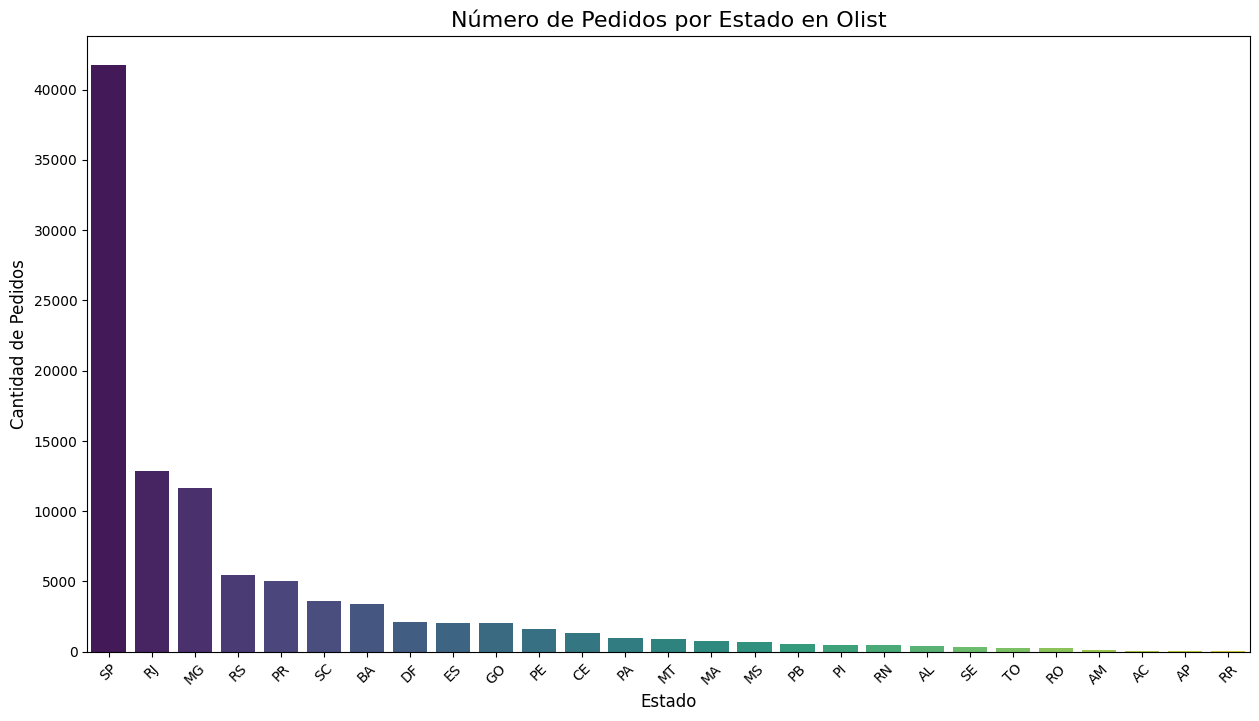

In [16]:
# Importamos las librerías
import matplotlib.pyplot as plt
import seaborn as sns

# Configuramos el tamaño del gráfico para que sea más grande y legible
plt.figure(figsize=(15, 8))

# Creamos el gráfico de barras con Seaborn (corregido para evitar el warning)
sns.barplot(x=conteo_por_estado.index, y=conteo_por_estado.values, hue=conteo_por_estado.index, palette='viridis', legend=False)

# Añadimos títulos y etiquetas para que sea profesional
plt.title('Número de Pedidos por Estado en Olist', fontsize=16)
plt.xlabel('Estado', fontsize=12)
plt.ylabel('Cantidad de Pedidos', fontsize=12)
plt.xticks(rotation=45) # Rotamos las etiquetas del eje X para que no se solapen

# Mostramos el gráfico
plt.show()

In [18]:
# En una nueva celda
query_completa = """
SELECT
    o.order_id,
    o.order_status,
    o.order_purchase_timestamp, -- ¡Añadimos la fecha de compra!
    oi.product_id,
    oi.price, -- ¡Añadimos el precio del item!
    oi.freight_value, -- Y el coste del envío
    c.customer_unique_id,
    c.customer_city,
    c.customer_state
FROM
    orders AS o
LEFT JOIN
    customers AS c ON o.customer_id = c.customer_id
LEFT JOIN
    order_items AS oi ON o.order_id = oi.order_id
"""

# Ejecutamos la consulta y la guardamos en un DataFrame final
df_para_powerbi = pd.read_sql(query_completa, engine)

# Verificamos
print("DataFrame final para Power BI:")
df_para_powerbi.head()

DataFrame final para Power BI:


,order_id,order_status,order_purchase_timestamp,product_id,price,freight_value,customer_unique_id,customer_city,customer_state
0,02645c905eb7d1591a679f9bc3b669fd,delivered,2018-01-26 16:09:11,9f1c3e71d56894398a42b050b07f1baa,12.77,7.78,2aa9325eab1676f4d62830f004d67a34,sao jose dos campos,SP
1,001c85b5f68d2be0cb0797afc9e8ce9a,delivered,2017-11-24 19:19:18,84f456958365164420cfc80fbe4c7fab,99.00,13.71,55a269f324455e78349e7b9b7e7e5911,sao paulo,SP
2,02ea547b6d2ee25305588fd50df58b46,shipped,2017-03-23 22:03:43,b000447e24e31a4d7e628ca4d0622131,23.99,15.65,70a2aece5345a514bf960b01975aaa60,porto alegre,RS
3,03054d8a8eefc2981cfad06f58e27979,delivered,2017-10-02 10:25:22,3e31fd1419cc4cd6adad1925e72e3a03,58.90,15.16,d46eb9ba6d6b75c1dac85b91911fc9c2,sao paulo,SP
4,03ab852861cd75d0a9225c92a3354a3a,delivered,2017-12-10 10:03:25,374fb6698c278b6af1c7b7c8fb95585e,115.00,8.06,b525978184c53a6051f72e2343ffce0e,santos,SP


In [20]:
# Guardamos el DataFrame en un archivo CSV limpio
df_para_powerbi.to_csv('olist_analisis.csv', index=False)

print("\nArchivo 'olist_analisis.csv' creado con éxito. ¡Listo para Power BI!")


Archivo 'olist_analisis.csv' creado con éxito. ¡Listo para Power BI!
